In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import tensorflow as tf
import keras

In [283]:
def describe(df):                        # Function to explore major elements in a Dataset
                                         # Will help to find null values present and deal with them
  columns=df.columns.to_list()           # Function will help to directly find numerical and categorical columns
  ncol=df.describe().columns.to_list()
  ccol=[]
  for i in columns:
    if(ncol.count(i)==0):
      ccol.append(i)
    else:
      continue
  print('Name of all columns in the dataframe:')
  print(columns)
  print('')
  print('Number of columns in the dataframe:')
  print(len(columns))
  print('')
  print('Name of all numerical columns in the dataframe:')
  print(ncol)
  print('')
  print('Number of numerical columns in the dataframe:')
  print(len(ncol))
  print('')
  print('Name of all categorical columns in the dataframe:')
  print(ccol)
  print('')
  print('Number of categorical columns in the dataframe:')
  print(len(ccol))
  print('')
  print('------------------------------------------------------------------------------------------------')
  print('')
  print('Number of Null Values in Each Column:')
  print('')
  print(df.isnull().sum())
  print('')
  print('')
  print('Number of Unique Values in Each Column:')
  print('')
  print(df.nunique())
  print('')
  print('')
  print('Basic Statistics and Measures for Numerical Columns:')
  print('')
  print(df.describe().T)
  print('')
  print('')
  print('Other Relevant Metadata Regarding the Dataframe:')
  print('')
  print(df.info())
  print('')
  print('')

In [284]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [285]:
describe(df)

Name of all columns in the dataframe:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Number of columns in the dataframe:
18

Name of all numerical columns in the dataframe:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

Number of numerical columns in the dataframe:
14

Name of all categorical columns in the dataframe:
['Month', 'VisitorType', 'Weekend', 'Revenue']

Number of categorical columns in the dataframe:
4

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

In [286]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Administrative_Duration,0.60,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Informational,0.38,0.30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Informational_Duration,0.26,0.24,0.62,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ProductRelated,0.43,0.29,0.37,0.28,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.20,-0.18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,nan,nan,nan,nan,nan,nan,nan,nan,nan
PageValues,0.10,0.07,0.05,0.03,0.06,0.05,-0.12,-0.17,nan,nan,nan,nan,nan,nan,nan,nan
SpecialDay,-0.09,-0.07,-0.05,-0.03,-0.02,-0.04,0.07,0.10,-0.06,nan,nan,nan,nan,nan,nan,nan


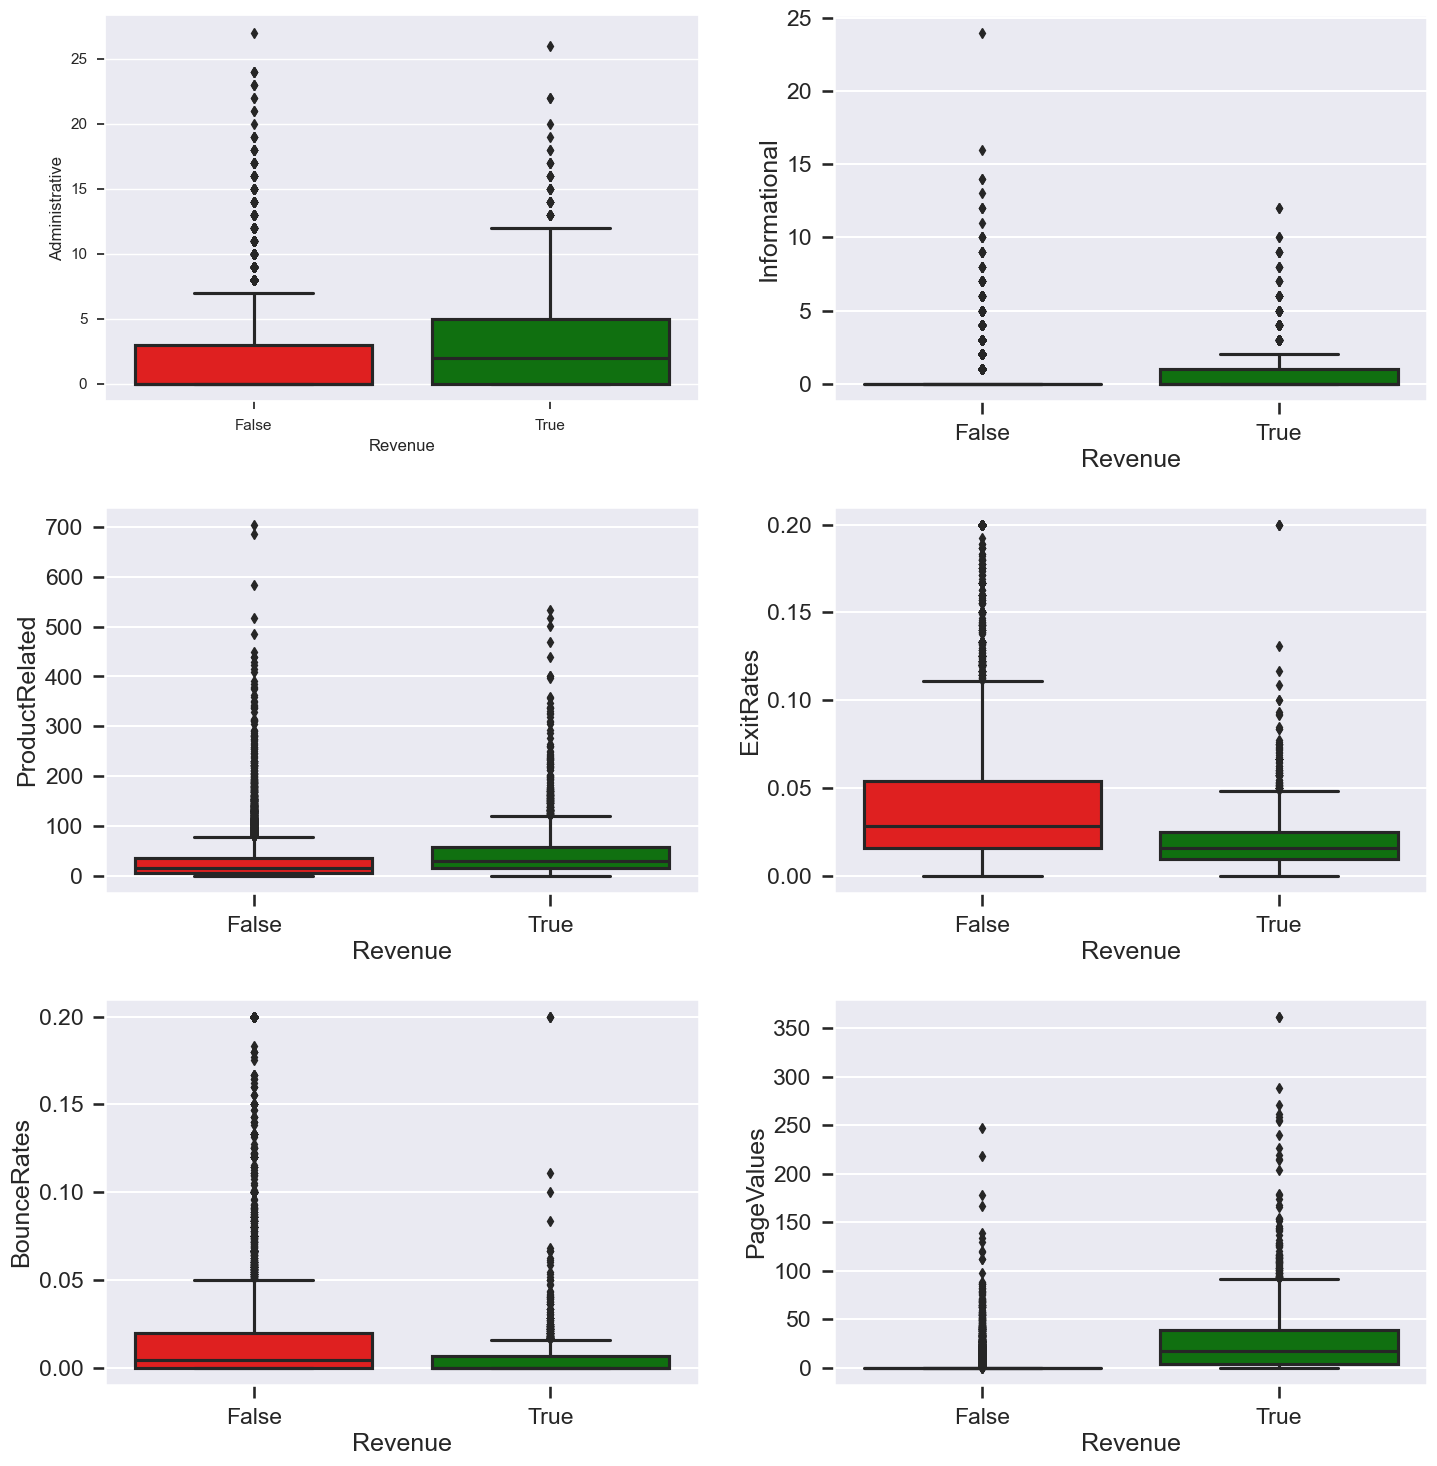

In [287]:
oe=['r','g']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="Administrative",x='Revenue',palette=oe)
#ax.set(xlabel='Sex ', ylabel='Count')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="Informational", x="Revenue",palette=oe)
#ax.set(xlabel='ChestPainType', ylabel='Count')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="ProductRelated", x="Revenue",palette=oe)
#ax.set(xlabel='ExerciseAngina', ylabel='Count')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="ExitRates", x="Revenue",palette=oe)
#ax.set(xlabel='RestingECG', ylabel='Count')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="BounceRates", x="Revenue",palette=oe)
#ax.set(xlabel='ST_Slope', ylabel='Count')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="PageValues", x="Revenue",palette=oe)
#ax.set(xlabel='FastingBS', ylabel='Count')
plt.show()

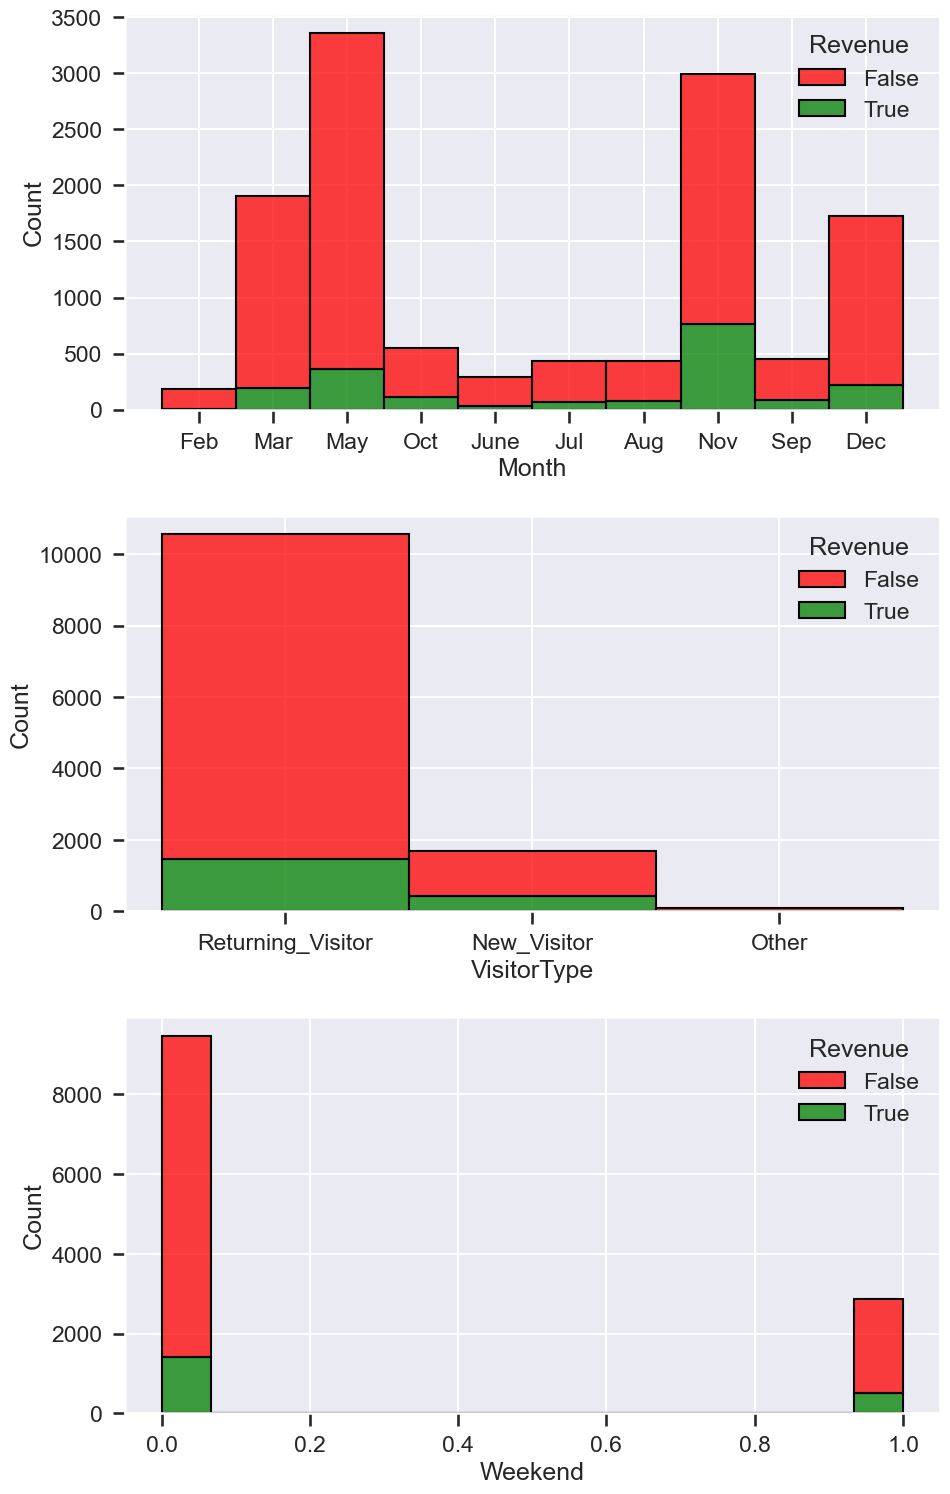

In [288]:
fig = plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Month", hue="Revenue",multiple="stack",palette=oe)


plt.subplot(3,1,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="VisitorType", hue="Revenue",multiple="stack",palette=oe)


plt.subplot(3,1,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Weekend", hue="Revenue",multiple="stack",palette=oe)
plt.show()




In [289]:
df['VisitorType'] = df['VisitorType'].map({'Returning_Visitor':2,'New_Visitor':1, 'Other':0})
df.insert(len(df.columns)-1, 'TotalDuration', 0)
df['TotalDuration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Revenue'] = df['Revenue'].map({True:1,False:0})
df.drop(columns=['Month', 'Weekend','Administrative_Duration','Informational_Duration','SpecialDay'], axis=1, inplace=True)
df.drop(columns=['ProductRelated_Duration','BounceRates','OperatingSystems','Browser','Region','TrafficType'] ,axis=1, inplace=True)

In [290]:
df.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,VisitorType,TotalDuration,Revenue
0,0,0,1,0.20,0.0,2,0.000000,0
1,0,0,2,0.10,0.0,2,64.000000,0
2,0,0,1,0.20,0.0,2,0.000000,0
3,0,0,2,0.14,0.0,2,2.666667,0
4,0,0,10,0.05,0.0,2,627.500000,0


In [291]:
def outliers(df_column):
  q75, q25 = np.percentile(df_column, [75 ,25]) 
  iqr = q75 - q25
  print('q75: ',q75)
  print('q25: ',q25)
  print('Inter Quartile Range: ',iqr)
  print('Outliers lie before', q25-2*iqr, 'and beyond', q75+1.8*iqr) 

  # Usually 1.5 times IQR is considered, but we have used 1.8 for broader range

  print('Number of Rows with Left Extreme Outliers:', len(df[df_column <q25-1.8*iqr]))
  print('Number of Rows with Right Extreme Outliers:', len(df[df_column>q75+1.8*iqr]))
  plt.tight_layout()
  plt.style.use('seaborn')
  sns.set_context('notebook')
  sns.histplot(data=df, x=df_column, hue="Revenue",multiple="stack",palette=oe, kde=True)
  plt.show()

q75:  4.0
q25:  0.0
Inter Quartile Range:  4.0
Outliers lie before -8.0 and beyond 11.2
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 299


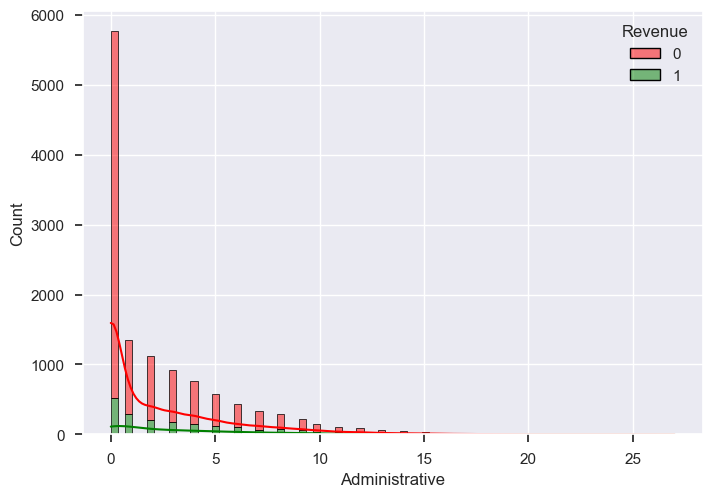

In [292]:
#Administrative	Informational	ProductRelated	ExitRates	PageValues	SpecialDay	TotalDuration	Revenue
outliers(df['Administrative'])

In [293]:
df.drop(df[(df['Administrative'] > 11.2) & (df['Revenue'] == 0)].index, inplace=True)

q75:  0.0
q25:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2491


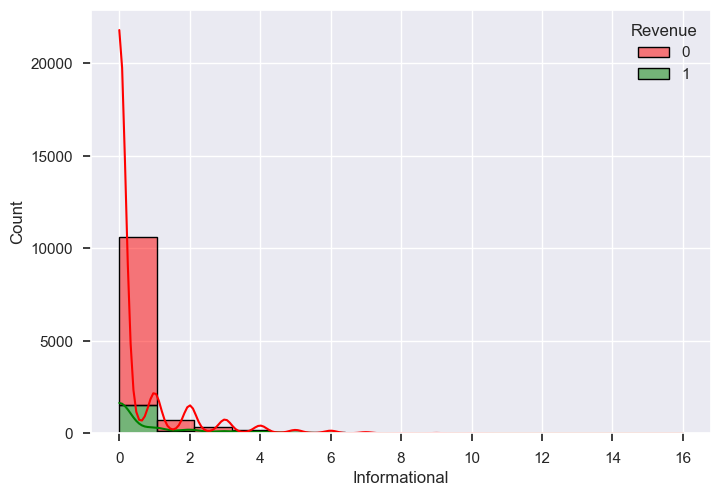

In [294]:
outliers(df['Informational'])

In [295]:
df.drop(df[(df['Informational'] > 4) & (df['Revenue'] == 0)].index, inplace=True)

q75:  36.0
q25:  7.0
Inter Quartile Range:  29.0
Outliers lie before -51.0 and beyond 88.2
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 786


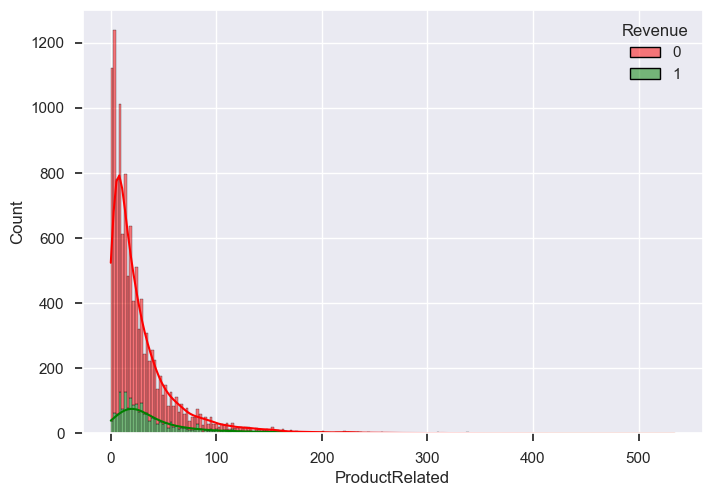

In [296]:
outliers(df['ProductRelated'])

In [297]:
df.drop(df[(df['ProductRelated'] > 89) & (df['Revenue'] == 0)].index, inplace=True)

q75:  0.05
q25:  0.014285714
Inter Quartile Range:  0.035714286000000005
Outliers lie before -0.05714285800000001 and beyond 0.11428571480000001
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 1040


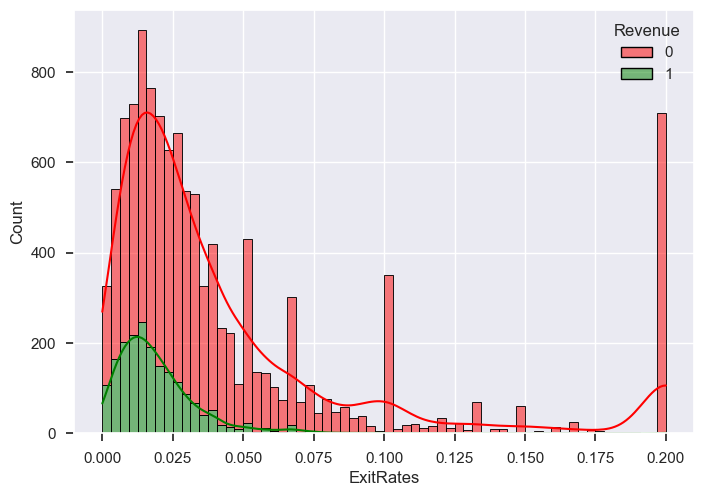

In [298]:
outliers(df['ExitRates'])

In [299]:
df.drop(df[(df['ExitRates'] > 0.114) & (df['Revenue'] == 0)].index, inplace=True)

q75:  1485.23184025
q25:  279.0
Inter Quartile Range:  1206.23184025
Outliers lie before -2133.4636805 and beyond 3656.4491527
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 504


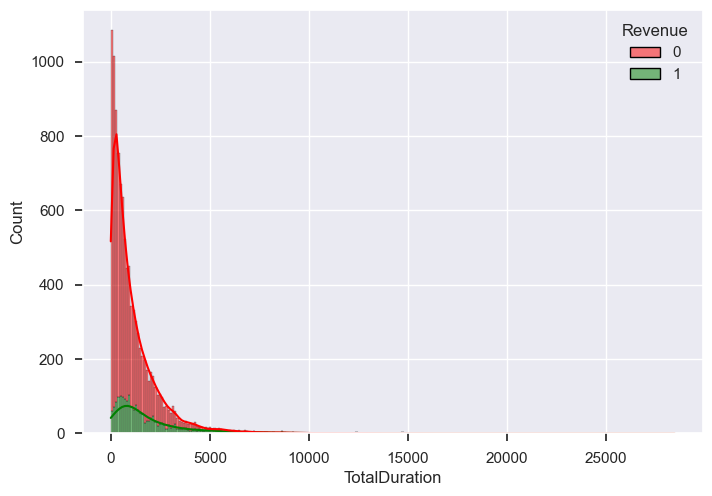

In [300]:
outliers(df['TotalDuration'])

In [301]:
df.drop(df[(df['TotalDuration'] > 3656) & (df['Revenue'] == 0)].index, inplace=True)

In [119]:
def OHE(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([dummies,df],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True) # We have to drop columns to aviod multi-collinearity
  if(finallencol==len(df.columns)):
    print('One Hot Encoding was successful!') 
    print('')
  else:
    print('Error in OHE XXXX')
  return df

In [302]:
df

,Administrative,Informational,ProductRelated,ExitRates,PageValues,VisitorType,TotalDuration,Revenue
1,0,0,2,0.100000,0.000000,2,64.000000,0
4,0,0,10,0.050000,0.000000,2,627.500000,0
5,0,0,19,0.024561,0.000000,2,154.216667,0
8,0,0,2,0.100000,0.000000,2,37.000000,0
9,0,0,3,0.022222,0.000000,2,738.000000,0
...,...,...,...,...,...,...,...,...
12325,3,0,53,0.029031,12.241717,2,1928.791667,0
12326,0,0,5,0.021333,0.000000,2,465.750000,0
12327,0,0,6,0.086667,0.000000,2,184.250000,0
12328,4,0,15,0.021053,0.000000,2,421.000000,0


In [303]:
for column in df.columns:
    df[column] = df[column] / df[column].abs().max()


In [24]:
def PCA(X , num_components):
  
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index][0:num_components]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced, sorted_eigenvalue

In [25]:
X_PCA, lambdas = PCA(df.values[:, 0:-1],5)

In [26]:
for i in lambdas:
    print(i/lambdas.sum())

0.6594691986597693
0.17858389048854678
0.0876540798400982
0.044892040595550374
0.02940079041603532


In [54]:
df.values[:,-1]

array([0., 0., 0., ..., 0., 0., 0.])

In [227]:
class LogisticRegression:
    def __init__(self, X,y,learningRate, tolerance, maxIteration, threshold) ->  None:
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.threshold = threshold
    
    #funtion to load the dataset
    def split(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X,self.y,test_size=0.25,random_state=42)
        sm = SMOTEENN(random_state=0)
        X_res, y_res = sm.fit_resample(X_train, y_train)
        return X_res, X_test, y_res, y_test

    
    #for gradiant descent,the functions we might need are- 
    #1) sigmoid function
    #2) cost function and
    #3) its cost derivative
    #4) fit function
    #5) evaluate function
    #6) predict function
    def sigmoid(self, z):
        sig = 1/(1 + np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        
        sig = self.sigmoid(X.dot(self.w))
        #approch 1
        #cost = (y * np.log(sig) + (1-y) * np.log(1 - sig)).sum()
        #cost = -cost / X.shape[0]
        
        #approch 2
        cost = (np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w)) - X.dot(self.w).dot(y)))
        cost = cost.sum()
        
        return cost #do a comparison by selecting each and checking
    
    def gradiant(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        gradiant = (sig - y).dot(X)
        return gradiant
    
    def normalizeTrainData(self, X):
        mean = np.mean(X,0)
        std = np.std(X,0)
        X_norm = (X-mean)/std

        return X_norm, mean, std

    def normalizeTestData(self, X, mean, std):
        X_norm = (X-mean)/std

        return X_norm  
    
    def gradientDescent(self, X,y):
        errors=[] #vector to keep track of the errors
        last_error = float('inf')# last error for comparison
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradiant(X,y)
            
            current_error = self.costFunction(X , y)
            diff = last_error - current_error
            last_error = current_error
            errors.append(current_error)
            
            if np.abs(diff) < self.tolerance:
                print('model stopped learning')
                break
            
        return
    
    #after the trainig is done and youve gotten the w that you want
    #when you want to make a prediction you care about the prob of it belonging
    #to class 1, which is you have to put it in a sigmoid on which you keep a threshold
        
    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w)) #it gives you the probability
        #of it belonging to class 1
        return np.where(sig > self.threshold, 1, 0)
    
    
    
    def evaluate(self, y, y_hat):
        y = (y==1) # to convert the vector values to boolean for ease of calc.
        y_hat = (y_hat == 1) # to convert the vector values to boolean for ease of calc.
        # to check everywhere that each has correctly classified as true
        recall = (y & y_hat).sum() / y.sum() #recall = the total that were actually positive out of the classified positive
        precision = (y & y_hat).sum() / y_hat.sum()
        
        f_score = 2*(precision * recall)/(precision + recall)
        return f_score, recall, precision
    
    def fit(self):
        X_train, X_test, y_train, y_test = self.split()
        fold_grad= np.zeros(X_train.shape[1],)
        XT = np.array_split(X_train,5)
        YT = np.array_split(y_train,5)
        for i in range (4,-1,-1):
            X_train = np.delete(XT,i,0)
            X_train = np.concatenate(X_train)
            y_train = np.delete(YT,i,0)
            y_train = np.concatenate(y_train)
            X_val = XT[i]
            y_val = YT[i]
            print(" ")
            print(" ")
            print('Training Fold ',i+1)
            print(" ")
            print(" ")
            print('Solving using gradiant Descent')
            self.w = np.ones(X_train.shape[1], dtype = np.float64) * 0 #random inniatialization of w's
            self.gradientDescent(X_train, y_train)
            print(self.w)
            fold_grad = np.add(fold_grad,self.w)
            
            y_train_hat = self.predict(X_val)
            print(y_train_hat[0:5])#predict the values
            f_score, recall, precision = self.evaluate(y_val, y_train_hat) #evaluation
            #print('')
            #print('')
            #print('The train F1 score of the model is {}'.format(f_score))
            #print('The train recall of the model is {}'.format(recall))
            print('The train precision of the model is {}'.format(precision))
            
        print("  ")
        print("TEST SET RESULTS")
        print("  ")
        
        self.w = np.divide(fold_grad,5)
        print(self.w)
        y_train_hat = self.predict(X_test) #predict the values
        f_score, recall, precision = self.evaluate(y_test, y_train_hat) #evaluation
        print('')
        print('')
        print('The train F1 score of the model is {}'.format(f_score))
        print('The train recall of the model is {}'.format(recall))
        print('The train precision of the model is {}'.format(precision))


        
        




In [239]:
lr = LogisticRegression(df.values[:, 0:-1], df.values[:,-1],learningRate= 0.005, 
                        tolerance= 0.00005, maxIteration= 20000, threshold = 0.5)
lr.fit()

  3%|▎         | 559/20000 [00:00<00:06, 2820.37it/s]

 
 
Training Fold  5
 
 
Solving using gradiant Descent


  1%|▏         | 270/20000 [00:00<00:07, 2697.74it/s]

[ -0.23566935   2.96947318  11.81965645  -1.49892262 138.69978319
  -3.63239859  13.57070799]
[1 1 1 1 1]
The train precision of the model is 1.0
 
 
Training Fold  4
 
 
Solving using gradiant Descent


  1%|▏         | 264/20000 [00:00<00:07, 2636.44it/s]

[ -0.87776964   3.63601065  13.40168798  -0.96073104 141.86145984
  -3.79878885  13.4532062 ]
[1 1 1 1 1]
The train precision of the model is 1.0
 
 
Training Fold  3
 
 
Solving using gradiant Descent


  1%|          | 220/20000 [00:00<00:08, 2199.16it/s]

[-1.29073120e-01  3.57971247e+00  1.30829865e+01 -6.56534141e-01
  1.58396276e+02 -2.98472552e+00  1.24795201e+01]
[0 0 0 0 0]
The train precision of the model is 0.9722662440570523
 
 
Training Fold  2
 
 
Solving using gradiant Descent


  1%|          | 247/20000 [00:00<00:08, 2468.61it/s]

[  0.91029579   3.46174693  12.63368281   0.42484422 168.7172486
  -2.61768658  15.20054833]
[0 1 0 0 0]
The train precision of the model is 0.0
 
 
Training Fold  1
 
 
Solving using gradiant Descent


100%|██████████| 20000/20000 [00:08<00:00, 2391.32it/s]

[  0.66164725   3.76457136  15.06488129   0.32568294 172.77464572
  -3.69914387  10.9920911 ]
[0 0 0 0 0]
The train precision of the model is 0.0
  
TEST SET RESULTS
  
[ 6.58861857e-02  3.48230292e+00  1.32005790e+01 -4.73132127e-01
  1.56089883e+02 -3.34654868e+00  1.31392147e+01]


The train F1 score of the model is 0.728695652173913
The train recall of the model is 0.8363273453093812
The train precision of the model is 0.6456086286594761


In [262]:
X_train, X_test, y_train, y_test = train_test_split(df.values[:, 0:-1], df.values[:,-1],test_size=0.25,random_state=0)
sm = SMOTEENN(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
weights = {0:1, 1:1.2}
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,kernel_initializer='he_uniform'),
    keras.layers.Dense(16, activation=tf.nn.relu),
     keras.layers.Dense(8, activation=tf.nn.relu),
    
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=60, batch_size=512,class_weight = weights)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/60
9873/9873 [==============================] - 0s 42us/step - loss: 16.0329 - accuracy: 0.5046
Epoch 2/60
9873/9873 [==============================] - 0s 7us/step - loss: 2.6464 - accuracy: 0.5212
Epoch 3/60
9873/9873 [==============================] - 0s 7us/step - loss: 1.1398 - accuracy: 0.6353
Epoch 4/60
9873/9873 [==============================] - 0s 8us/step - loss: 1.5179 - accuracy: 0.6711
Epoch 5/60
9873/9873 [==============================] - 0s 9us/step - loss: 1.9316 - accuracy: 0.6540
Epoch 6/60
9873/9873 [==============================] - 0s 8us/step - loss: 2.2496 - accuracy: 0.6590
Epoch 7/60
9873/9873 [==============================] - 0s 7us/step - loss: 1.1124 - accuracy: 0.7429
Epoch 8/60
9873/9873 [==============================] - 0s 7us/step - loss: 0.3610 - accuracy: 0.8921
Epoch 9/60
9873/9873 [==============================] - 0s 6us/step - loss: 0.3396 - accuracy: 0.8969
Epoch 10/60
9873/9873 [==============================] - 0s 6us/step - loss: 0.2

In [265]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.89)
y_pred = np.concatenate(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Total Mistakes ',cm[0][1]+cm[1][0])
result = pd.DataFrame(data=np.column_stack((y_test,y_pred)),columns=['Actual','Prediction'])
TN = len(result[(result.Actual==0) & (result.Prediction==0)])
TP = len(result[(result.Actual==1) & (result.Prediction==1)])
FP = len(result[(result.Actual==0) & (result.Prediction==1)])
FN = len(result[(result.Actual==1) & (result.Prediction==0)])
Total = len(result)
print('Model Accuracy is: ', (TP + TN) / Total)
print('Model Precision is: ', (TP / (TP + FP)))
print('Model Recall is: ', (TP / (TP + FN)))

[[1892  169]
 [ 103  386]]
Total Mistakes  272
Model Accuracy is:  0.8933333333333333
Model Precision is:  0.6954954954954955
Model Recall is:  0.7893660531697342


,Actual,Prediction
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0


Model Accuracy is:  0.8906976744186047
Model Precision is:  0.6904761904761905
Model Recall is:  0.7341772151898734


In [235]:
from sklearn.metrics import f1_score
def bestThresshold(y_true,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.901, 0.01):
        score = f1_score(y_true, np.array(y_pred)>thresh)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

In [236]:
bestThresshold(result['Actual'],result['Prediction'])

(0.7533206831119544, 0.1)

In [346]:
len(df['TotalDuration'][df.Revenue==0])

10422

3